In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, roc_auc_score, roc_curve
from keras.models import Sequential
from keras.layers import Dense

# Mengimpor library yang dibutuhkan untuk manipulasi data, visualisasi, dan pembuatan model neural network.

In [2]:
# URL mentah dari file CSV di GitHub
url = 'https://raw.githubusercontent.com/Rexaaor/saham/main/NISP.JK.csv'

# Membaca file CSV dari URL
df = pd.read_csv(url)

# Memeriksa Tipe Data Kolom
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [3]:
# Menghitung persentase perubahan dari kolom 'Close' dan membuat kolom 'Return'
df['Return'] = df['Close'].pct_change()
df.dropna(inplace=True)
df['Label'] = np.where(df['Return'] > 0, 1, 0)

In [4]:
# Standarisasi data
scaler = StandardScaler()
df['Return_scaled'] = scaler.fit_transform(df[['Return']])

In [5]:
# Memisahkan fitur dan label
X = df[['Return_scaled']]
y = df['Label']

# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Membuat model neural network
model = Sequential()
model.add(Dense(16, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Mengompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Melatih model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

Epoch 1/50
16/16 [==============================] - 1s 20ms/step - loss: 0.7529 - accuracy: 0.4803 - val_loss: 0.7028 - val_accuracy: 0.6579
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6814 - accuracy: 0.7500 - val_loss: 0.6507 - val_accuracy: 0.8947
Epoch 3/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6326 - accuracy: 0.8750 - val_loss: 0.6128 - val_accuracy: 0.8947
Epoch 4/50
16/16 [==============================] - 0s 8ms/step - loss: 0.5988 - accuracy: 0.8947 - val_loss: 0.5855 - val_accuracy: 0.8947
Epoch 5/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5697 - accuracy: 0.8947 - val_loss: 0.5578 - val_accuracy: 0.8947
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.5407 - accuracy: 0.9605 - val_loss: 0.5310 - val_accuracy: 1.0000
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.5128 - accuracy: 1.0000 - val_loss: 0.5041 - val_accuracy: 1.0000
Epoch 8/50
16/16 [=

In [8]:
# Melakukan prediksi pada data testing
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Menghitung metrik evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Mencetak nilai metrik evaluasi
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'AUC: {auc}')

2/2 [==============================] - 0s 7ms/step
Accuracy: 1.0
Precision: 1.0
Confusion Matrix: 
[[24  0]
 [ 0 24]]
AUC: 1.0


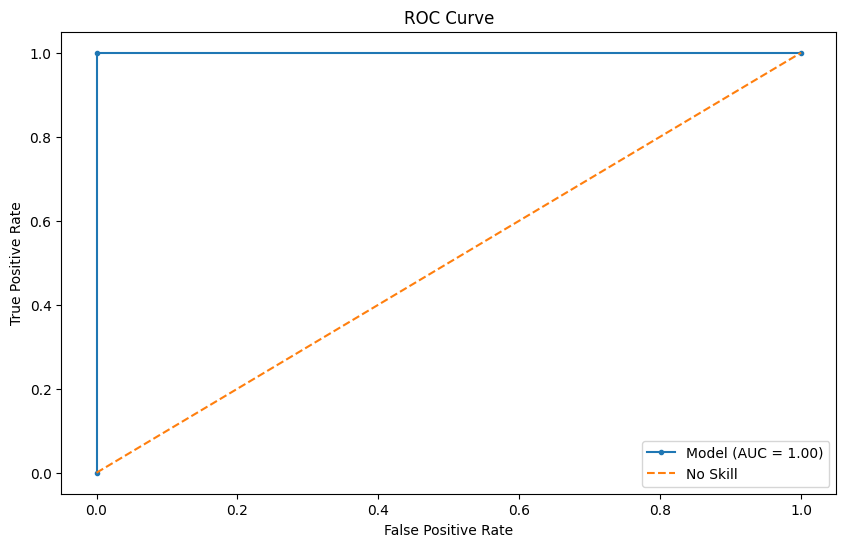

In [9]:
# Membuat plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, marker='.', label='Model (AUC = %0.2f)' % auc)
plt.plot([0,1],[0,1], linestyle='--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

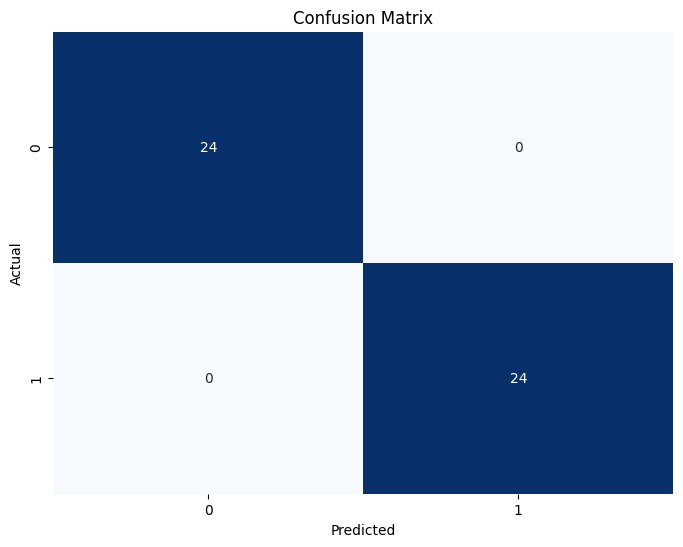

In [10]:
# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [11]:
# Menggunakan data Return untuk prediksi
x_all = scaler.transform(df[['Return']])
predictions = model.predict(x_all)

# Melakukan inverse transformasi pada hasil prediksi
predictions_rescaled = scaler.inverse_transform(predictions)

# Menghitung Predicted_Close berdasarkan Predicted_Return dan Close sebelumnya
df['Predicted_Close'] = df['Close'].shift(1) * (1 + predictions_rescaled.flatten())
df.dropna(inplace=True)

8/8 [==============================] - 0s 3ms/step


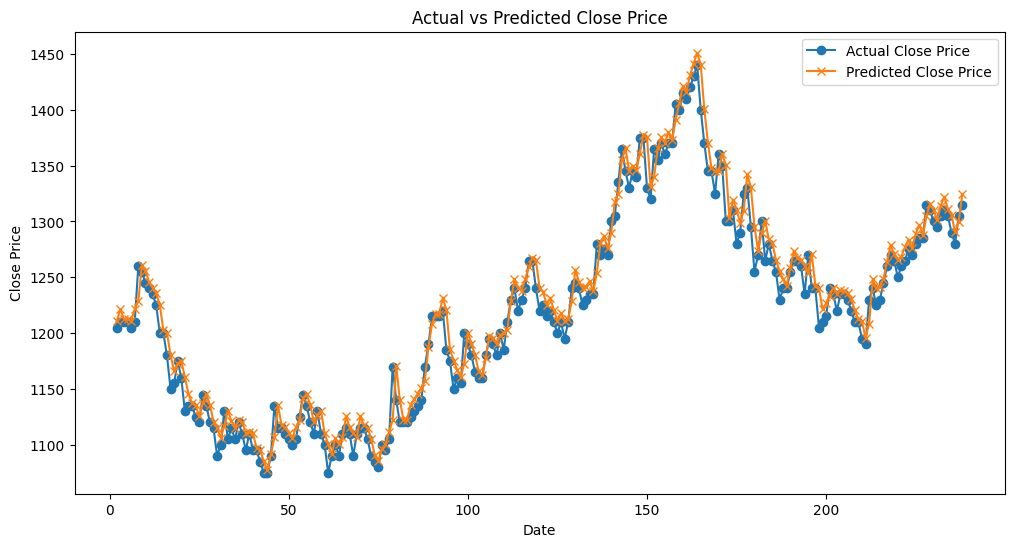

In [12]:
# Membuat plot untuk membandingkan harga penutupan aktual dan harga penutupan yang diprediksi
plt.figure(figsize=(12,6))
plt.plot(df['Close'], marker='o', label='Actual Close Price')
plt.plot(df['Predicted_Close'], marker='x', label='Predicted Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.show()